# Exploratory Data Anaylsis - 2018 Census Data

In [1]:
# import libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [10]:
# Importing the Data Set
df = pd.read_csv("2019_ALL_joins_reduced.csv")
df.head()

,state,person-weight,age,citizenship-status,class-worker,education,marital-status,occupation,race,sex,...,med_gross_rent,unemployment_rate,insured_rate,less_than_9th,hs_grad,associates_degree,bach_degree,grad_or_prof_degree,bach_degree_or_higher,Incarceration rate per 100000
0,GA,397,34,naturalized-citizen,Private-prof,bachelor,Married,MGR-Marketing Managers,asian-alone,female,...,1264,3.4,83.7,5.0,17.3,8.0,29.1,19.6,48.7,1073.655301
1,IL,58,41,Born-US,Local-gov,bachelor,Married,MGR-Other Managers,white-alone,female,...,1541,2.6,93.9,2.0,15.3,5.8,34.5,25.3,59.9,552.022691
2,NY,41,54,Born-US,Private-prof,HSgrad,Separated,PRD-Other Assemblers And Fabricators,white-alone,male,...,867,1.7,94.5,4.1,27.0,12.4,20.0,16.9,36.9,491.823193
3,NC,68,38,Born-US,Private-prof,HSgrad,Never-married,TRN-Stockers And Order Fillers,white-alone,male,...,866,3.8,88.5,4.3,27.2,8.3,19.1,9.2,28.4,646.847150
4,MS,54,55,Born-US,Private-prof,bachelor,Married,PRT-Security Guards And Gaming Surveillance Of...,black-aa-alone,male,...,588,3.2,88.3,6.0,38.0,6.6,9.8,6.1,15.9,1155.024253


## EDA with categorical variables like the original dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672300 entries, 0 to 1672299
Data columns (total 28 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   state                          1672300 non-null  object 
 1   person-weight                  1672300 non-null  int64  
 2   age                            1672300 non-null  int64  
 3   citizenship-status             1672300 non-null  object 
 4   class-worker                   1672300 non-null  object 
 5   education                      1672300 non-null  object 
 6   marital-status                 1672300 non-null  object 
 7   occupation                     1672300 non-null  object 
 8   race                           1672300 non-null  object 
 9   sex                            1672300 non-null  object 
 10  extra-income                   1672300 non-null  float64
 11  hours-per-week                 1672300 non-null  float64
 12  field-of-degre

In [5]:
print(df.shape)

(1672300, 28)


In [13]:
# checking null values
df.isnull().sum(axis = 0)

state                            0
person-weight                    0
age                              0
citizenship-status               0
class-worker                     0
education                        0
marital-status                   0
occupation                       0
race                             0
sex                              0
extra-income                     0
hours-per-week                   0
field-of-degree                  0
place-of-birth                   0
income                           0
stem-degree                      0
full PUMA                        0
med_home_value                   0
med_gross_rent                   0
unemployment_rate                0
insured_rate                     0
less_than_9th                    0
hs_grad                          0
associates_degree                0
bach_degree                      0
grad_or_prof_degree              0
bach_degree_or_higher            0
Incarceration rate per 100000    0
dtype: int64

There don't seem to be any missing values.

In [14]:
df.columns

Index(['state', 'person-weight', 'age', 'citizenship-status', 'class-worker',
       'education', 'marital-status', 'occupation', 'race', 'sex',
       'extra-income', 'hours-per-week', 'field-of-degree', 'place-of-birth',
       'income', 'stem-degree', 'full PUMA', 'med_home_value',
       'med_gross_rent', 'unemployment_rate', 'insured_rate', 'less_than_9th',
       'hs_grad', 'associates_degree', 'bach_degree', 'grad_or_prof_degree',
       'bach_degree_or_higher', 'Incarceration rate per 100000'],
      dtype='object')

In [15]:
# exploring income - target variable

df['income'].value_counts()

30000.0     43775
40000.0     42020
50000.0     41409
60000.0     35926
20000.0     32566
            ...  
536700.0        1
536800.0        1
33570.0         1
538100.0        1
131090.0        1
Name: income, Length: 19113, dtype: int64

Looks like we have a mix of whole number variables - people must have been given the option to check a box, or to enter in the exact amount.

In [16]:
df['income'].describe()

count    1.672300e+06
mean     6.017929e+04
std      7.677522e+04
min      1.040000e+02
25%      2.000000e+04
50%      4.000000e+04
75%      7.200000e+04
max      1.629000e+06
Name: income, dtype: float64

The maximum income is 1629000.0
The minimum income is 104.0


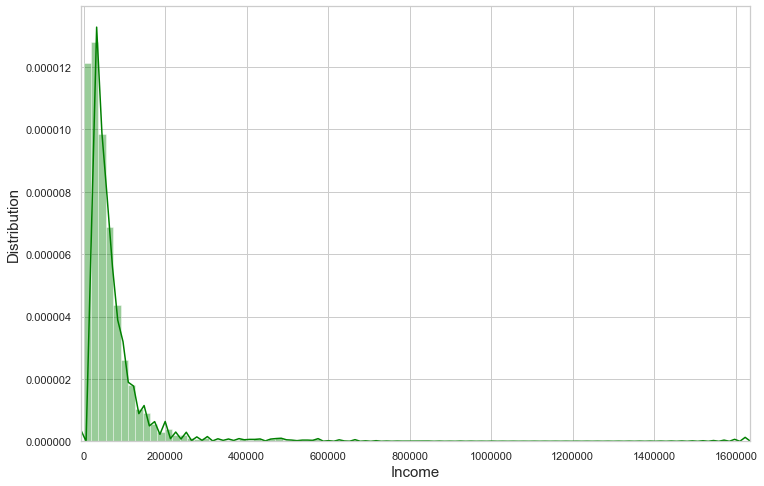

In [17]:
# distribution of income  

plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df['income'], bins = 90, color = 'green')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Income", fontsize = 15)
plt.margins(x = 0)

print ("The maximum income is", df['income'].max())
print ("The minimum income is", df['income'].min())

In [28]:
df.loc[df['income'] <= 50000, 'income_adjusted'] = '<=50K'
df.loc[df['income'] > 50000, 'income_adjusted'] = '>50K' 
df.head()

,state,person-weight,age,citizenship-status,class-worker,education,marital-status,occupation,race,sex,...,unemployment_rate,insured_rate,less_than_9th,hs_grad,associates_degree,bach_degree,grad_or_prof_degree,bach_degree_or_higher,Incarceration rate per 100000,income_adjusted
0,GA,397,34,naturalized-citizen,Private-prof,bachelor,Married,MGR-Marketing Managers,asian-alone,female,...,3.4,83.7,5.0,17.3,8.0,29.1,19.6,48.7,1073.655301,>50K
1,IL,58,41,Born-US,Local-gov,bachelor,Married,MGR-Other Managers,white-alone,female,...,2.6,93.9,2.0,15.3,5.8,34.5,25.3,59.9,552.022691,>50K
2,NY,41,54,Born-US,Private-prof,HSgrad,Separated,PRD-Other Assemblers And Fabricators,white-alone,male,...,1.7,94.5,4.1,27.0,12.4,20.0,16.9,36.9,491.823193,<=50K
3,NC,68,38,Born-US,Private-prof,HSgrad,Never-married,TRN-Stockers And Order Fillers,white-alone,male,...,3.8,88.5,4.3,27.2,8.3,19.1,9.2,28.4,646.847150,<=50K
4,MS,54,55,Born-US,Private-prof,bachelor,Married,PRT-Security Guards And Gaming Surveillance Of...,black-aa-alone,male,...,3.2,88.3,6.0,38.0,6.6,9.8,6.1,15.9,1155.024253,>50K


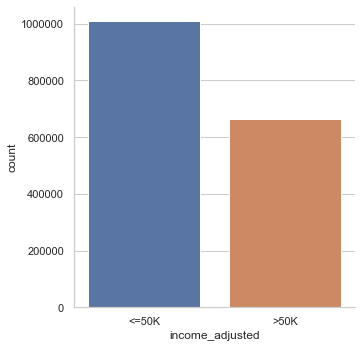

In [32]:
# distribution of income  

sns.catplot(x="income_adjusted", kind="count", data=df, order = ['<=50K', '>50K'])

In [35]:
df.groupby("income_adjusted").count()

,state,person-weight,age,citizenship-status,class-worker,education,marital-status,occupation,race,sex,...,med_gross_rent,unemployment_rate,insured_rate,less_than_9th,hs_grad,associates_degree,bach_degree,grad_or_prof_degree,bach_degree_or_higher,Incarceration rate per 100000
income_adjusted,,,,,,,,,,,,,,,,,,,,,
<=50K,1009442,1009442,1009442,1009442,1009442,1009442,1009442,1009442,1009442,1009442,...,1009442,1009442,1009442,1009442,1009442,1009442,1009442,1009442,1009442,1009442
>50K,662858,662858,662858,662858,662858,662858,662858,662858,662858,662858,...,662858,662858,662858,662858,662858,662858,662858,662858,662858,662858


In [19]:
# age

df['age'].describe()

count    1.672300e+06
mean     4.365817e+01
std      1.540178e+01
min      1.700000e+01
25%      3.100000e+01
50%      4.400000e+01
75%      5.600000e+01
max      9.600000e+01
Name: age, dtype: float64

The maximum age is 96
The minimum age is 17


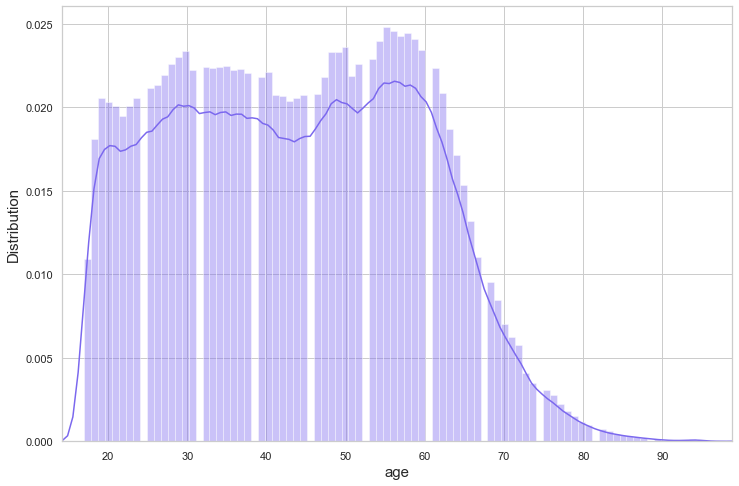

In [21]:
# distribution of Age 

plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df['age'].max())
print ("The minimum age is", df['age'].min())

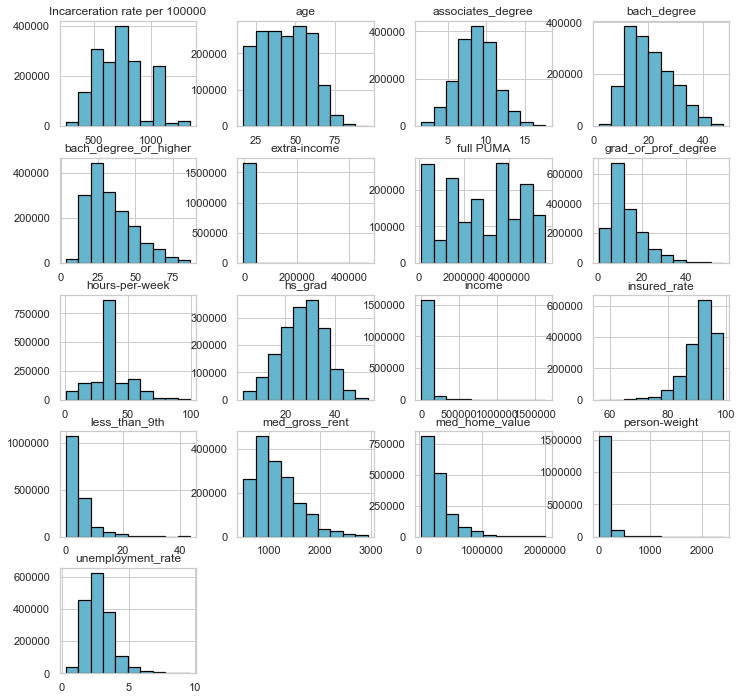

In [22]:
# Distribution of Different numerical features of the Dataset
distribution = df.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

# occupation shows as numerical - it should be categorical

In [23]:
# hours per week - mean vs median - are there outliers?

print (df['hours-per-week'].median())
print (df['hours-per-week'].mean())

40.0
38.22959995216169


In [24]:
# class of worker

df['class-worker'].value_counts()

Private-prof        1080559
Private-nonprof      150023
Local-gov            134927
Self-emp-not-inc     106917
State-gov             74246
Self-emp-inc          65919
Fed-gov               54350
Without-pay            5359
Name: class-worker, dtype: int64

In [25]:
# education

df['education'].value_counts()

bachelor               378297
HSgrad                 342296
some-college-great1    249710
master                 166634
associate              154224
some-college-less1     120693
GED                     56414
prof-school             42512
grade11                 33419
doctorate               29004
grade12-nograd          27036
grade10                 18292
no-school               15860
grade9                  12414
grade6                   8500
grade8                   8228
grade7                   2412
grade5                   1803
grade3                   1668
grade4                   1114
grade2                    796
grade1                    421
preschool                 294
kindergarten              259
Name: education, dtype: int64

In [26]:
# race
df['race'].value_counts()

white-alone              1306709
black-aa-alone            144781
asian-alone               100817
other-race-alone           60944
two-or-more-races          41913
american-indian-alone      11430
native-hi-pac-isl           2819
indian-or-ak-native         2016
alaska-native-alone          871
Name: race, dtype: int64

In [36]:
df_2018_eda['extra-income'].value_counts()

0.0        664042
1000.0       3696
100.0        3243
10000.0      3012
5000.0       2881
            ...  
45900.0         1
46100.0         1
46600.0         1
47900.0         1
47200.0         1
Name: extra-income, Length: 696, dtype: int64

looks like the bulk of people in the dataset do not have extra income reported on the census

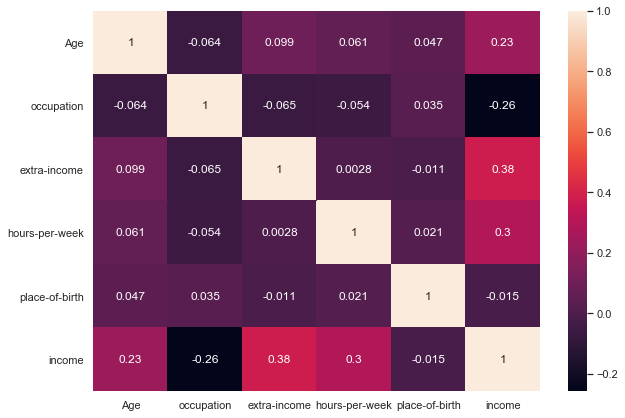

In [42]:
# heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df_2018_eda.corr(), annot = True);

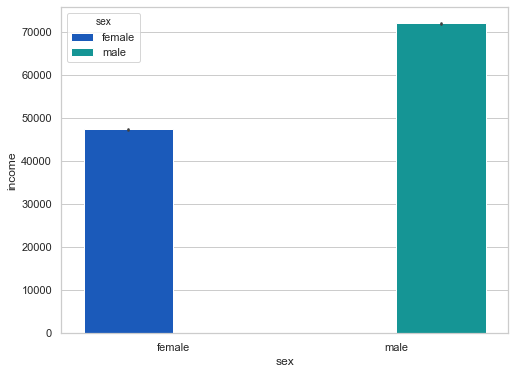

In [27]:
# difference in income between male and female 
sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = df['sex'], y = df['income'], data = df,
            estimator = mean, hue = 'sex', palette = 'winter');

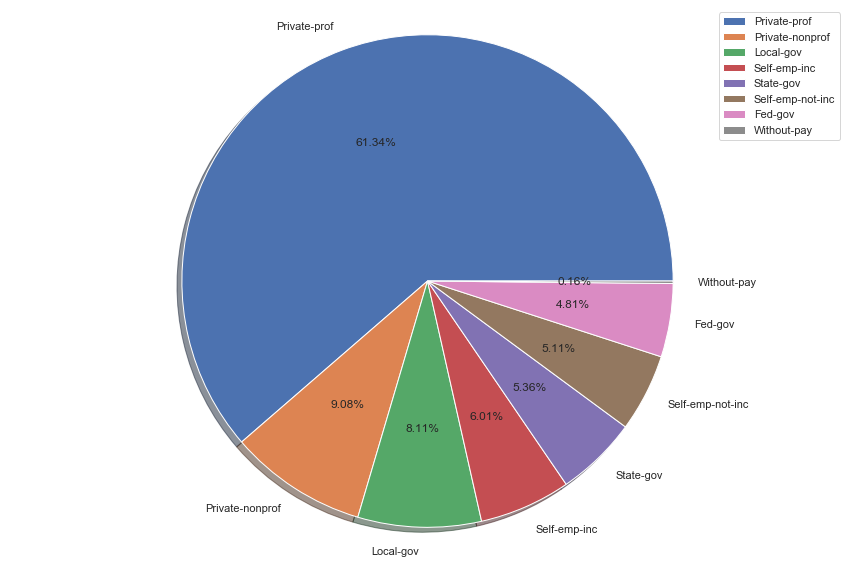

In [47]:
# Creating Series for the class-of-worker whose income is higher than 50K 
df_ = df_2018_eda.loc[df_2018_eda['income'] > 50000,['class-worker']]
workclass_types = df_['class-worker'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# pie chart - Percentage of different class of worker who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

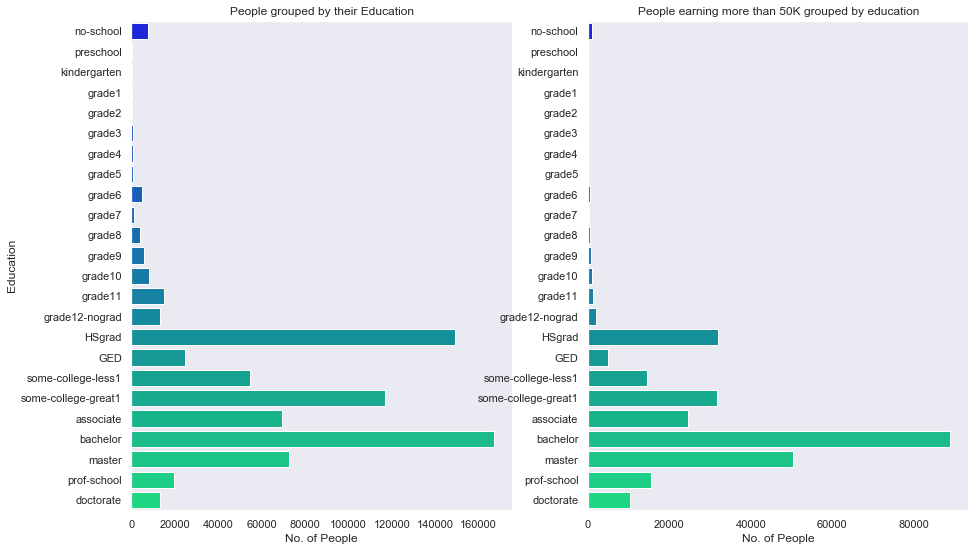

In [49]:
# Grouping people by their education
education_size = df_2018_eda.groupby('education').size()

# Grouping people who earns more than 50K by their education
more_income = df_2018_eda.loc[df_2018_eda['income']> 50000, ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People grouped by their Education")
ax[1].title.set_text("People earning more than 50K grouped by education")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = ['no-school', 'preschool', 'kindergarten', 
                               'grade1', 'grade2', 'grade3', 'grade4', 'grade5', 
                               'grade6', 'grade7', 'grade8', 'grade9', 'grade10',
                               'grade11', 'grade12-nograd','HSgrad', 'GED',
                               'some-college-less1', 'some-college-great1', 'associate',
                               'bachelor', 'master', 'prof-school', 'doctorate'], ax = ax[0])

# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(more_income), y = list(more_income.index), palette = 'winter',
                       order = ['no-school', 'preschool', 'kindergarten', 
                               'grade1', 'grade2', 'grade3', 'grade4', 'grade5', 
                               'grade6', 'grade7', 'grade8', 'grade9', 'grade10',
                               'grade11', 'grade12-nograd','HSgrad', 'GED',
                               'some-college-less1', 'some-college-great1', 'associate',
                               'bachelor', 'master', 'prof-school', 'doctorate'], ax = ax[1])

## Grouping by race and income

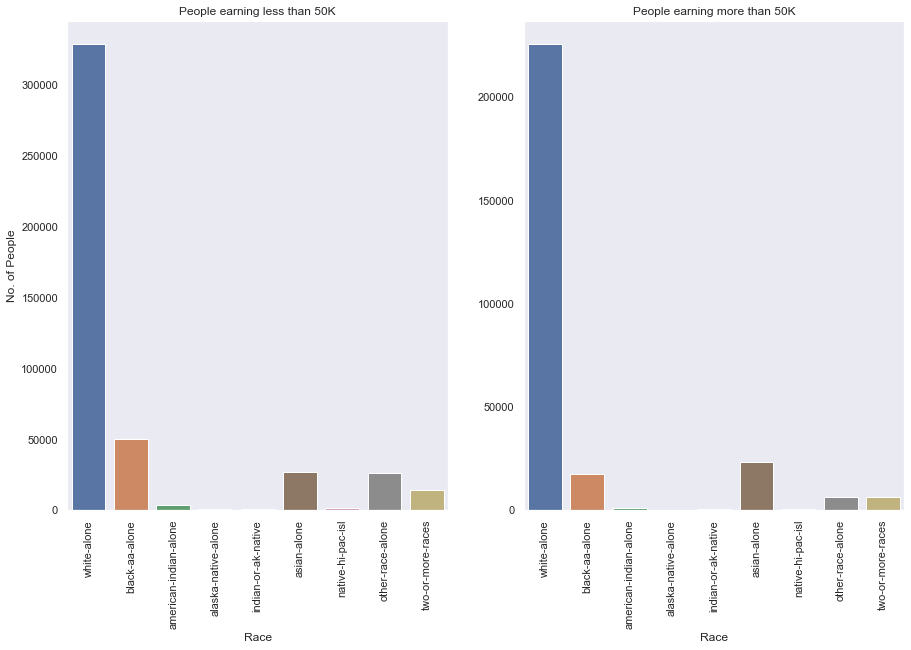

In [50]:
# axes Labels and Titles 
fig, ax = plt.subplots(1,2)
ax[0].set_xlabel('Race')
ax[1].set_xlabel('Race')
ax[0].set_ylabel('No. of People')
ax[0].title.set_text("People earning less than 50K")
ax[1].title.set_text("People earning more than 50K")

# group by race and income
race_less = df_2018_eda.loc[df_2018_eda['income']< 50000].groupby('race').size()
race_more = df_2018_eda.loc[df_2018_eda['income']> 50000].groupby('race').size()

# This barplot shows the no.of people earning more or less than 50K according to their races
sns_race_1 = sns.barplot(x = list(race_less.index), y = list(race_less), ax = ax[0],
                         order = ['white-alone', 'black-aa-alone',
                                  'american-indian-alone', 'alaska-native-alone','indian-or-ak-native',
                                 'asian-alone', 'native-hi-pac-isl', 'other-race-alone',
                                 'two-or-more-races'])
sns_race_2 = sns.barplot(x = list(race_more.index), y = list(race_more), ax = ax[1],
                        order = ['white-alone', 'black-aa-alone',
                                  'american-indian-alone', 'alaska-native-alone','indian-or-ak-native',
                                 'asian-alone', 'native-hi-pac-isl', 'other-race-alone',
                                 'two-or-more-races'])

plt.setp(sns_race_1.get_xticklabels(), rotation = 90);
plt.setp(sns_race_2.get_xticklabels(), rotation = 90);